In [9]:
import numpy as np
import matplotlib.pyplot as matplot
import math

from numpy.lib.shape_base import expand_dims

print ("Import Complete")

Import Complete


In [3]:
#Initialisation Loop is here

d_time = 1.5625e-12

current_time = 0 #start_time
current_phase =0.5
current_amplitude = 1

Signal_Freq = 500000000 #signal frequency

StopTime = 1.4e-8 #end_time

sine_array = []
time_array = []

print("Initialisation complete")

while ( current_time < StopTime ) :

    temp = math.sin ( 2* math.pi * current_time * Signal_Freq + current_phase )
    current_time = current_time + d_time


    sine_array.append (temp)
    time_array.append (current_time)
    

Initialisation complete


Unmodulated Sine Signal


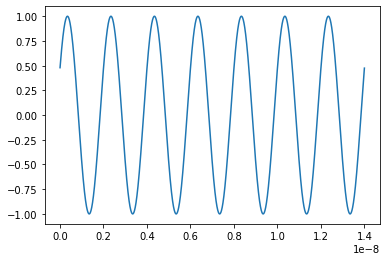

In [11]:
#plotting sine wave that was created

print("Unmodulated Sine Signal")
matplot.plot(time_array,sine_array) 

Total Iterations Ran:  8960
Modulated Signal


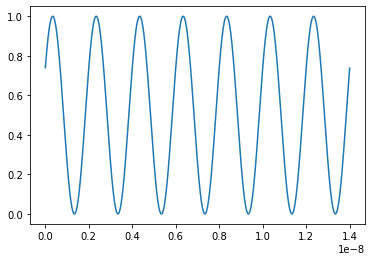

In [12]:
#Modulating the signal using MZ modulator

current_time = 0

current_itr = 0

mod_signal_array = []

while ( current_time < StopTime ):

    signal_temp = sine_array[ current_itr ]
    signal_temp = signal_temp/2
    signal_temp = (signal_temp + 0.5)
    mod_signal_array.append ( signal_temp )
    current_itr = current_itr + 1
    current_time = current_time + d_time

print("Total Iterations Ran: " , current_itr)
print("Modulated Signal")

total_iterations = current_itr

matplot.plot ( time_array, mod_signal_array )

In [13]:
#Inverse Calculation testing

freq_const = 2 * math.pi * Signal_Freq

signal_temp = mod_signal_array[1] - 0.5
signal_temp = signal_temp * 2

signal_temp = math.asin ( signal_temp )
temp_phase  = signal_temp - ( freq_const * d_time )

print( temp_phase )

0.5


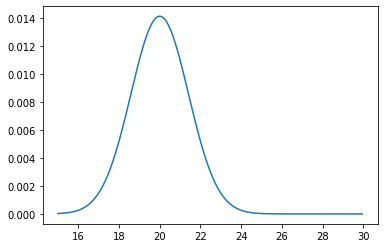

In [14]:
#Testing Gaussian Function

from filterpy.stats import gaussian

xs = np.arange(15, 30, 0.05)
matplot.plot(xs, gaussian(xs, 20, 2))



In [15]:
#Test Load Mat Component


import scipy.io as sio


print("Scipy loaded successfully")

opti_content = sio.loadmat ( 'opti_data_2.mat' )

iter_test = 0

print(opti_content['Opti_Signal'][0,iter_test])

print("Check if data is printing, if yes continue ")

Scipy loaded successfully
0.0014990009990763775
Check if data is printing, if yes continue 


In [16]:
#New Kalman Filter Implementation

predict_array = []
predict_time = []

def predict_f ( predict_phase , current_time ):

    cal_temp = math.sin ( (2* math.pi * current_time * Signal_Freq) + predict_phase)
    cal_temp = cal_temp/2 + 0.5
    predict_array.append(cal_temp)
    predict_time.append ( current_time )

    return ( cal_temp )

def measurement_function ( current_time ):

    temp = math.sin ( 2* math.pi * current_time * Signal_Freq + current_phase )
    current_time = current_time + d_time
     
    return( temp )

def  correction_step ( x_predict , predict_covariance, current_measurement, measurement_covariance ):

    e = x_predict
    E = predict_covariance
    R = measurement_covariance

    z = current_measurement - e 
    Z = E + R

    kalman_gain = E * (1/Z)

    new_x_predict = e + ( kalman_gain * z )

    predict_covariance = predict_covariance - (kalman_gain * predict_covariance )

    return ( new_x_predict, predict_covariance )

def phase_calculation ( updated_mean, delta_time ):

    freq_const = 2 * math.pi * Signal_Freq * delta_time

    signal_temp = updated_mean - 0.5
    signal_temp = signal_temp *2
    signal_temp = math.asin( signal_temp )
    phase = signal_temp - ( freq_const )

    return (phase)


initial_phase = 0
predict_covariance = 0.5
measurement_covariance = 0.5
current_time = 0
return_values = []

total_iterations = 8189

plot_array = []
iter_array = [] 
covariance_array = [] 

measure_array = []

for k in range (total_iterations) : 


    x_predict = predict ( initial_phase, current_time )
    measurement = measurement_function ( current_time )
    return_values = correction_step ( x_predict , predict_covariance , measurement, measurement_covariance)
    measure_array.append(return_values[0])
    initial_phase = phase_calculation ( return_values[0] , current_time)
    current_time = current_time + d_time
    #   print ( return_values[0] , return_values[1] )
    plot_array.append ( initial_phase )
    iter_array.append ( k )
    covariance_array . append ( return_values[1])
    predict_covariance = return_values[1]


#matplot.plot ( predict_time, predict_array )
matplot.plot ( predict_time, measure_array)
print(measure_array[k])





NameError: name 'predict' is not defined

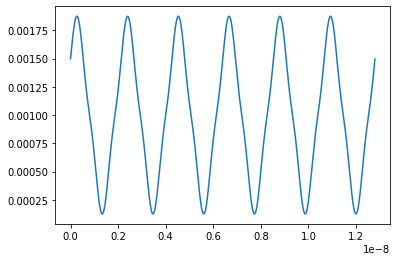

In [17]:
matplot.plot (  opti_content ['Opti_Time'][0], opti_content ['Opti_Signal'][0])

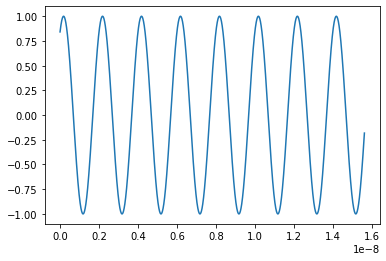

In [18]:
#Implementation of Unscented Kalman Filter

mod_y = [] # Array containing the modulated sine wave

iterations = 10000 #define number of iterations

amplitude = 1

current_time = 0

sine_phase = 1

Frequency = 500000000

mod_time = []

for i in range (iterations) :

    temp_calc = amplitude * math.sin (( 2 * math.pi * Frequency * current_time) + sine_phase)

    mod_y.append ( temp_calc )

    mod_time.append ( current_time )

    current_time =  current_time + d_time


matplot.plot ( mod_time , mod_y )



10000


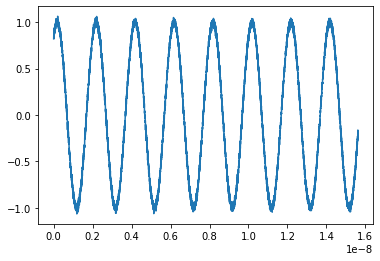

In [19]:
#Adding random noise to the function

from numpy.random import randn

mean = 0

variance = 0.021

print(iterations)

for i in range (iterations):

    mod_y[i] = mod_y[i] + ( variance * randn ()) + mean


matplot.plot ( mod_time , mod_y )

Extended Kalman Filter:
10000
current time: 0 Iterations: 0
Phase Variance :  1
actual is : 0.8224851864889924
Estimate is:  0.8414709848078965
0.9648607860586521 2.220446049250313e-16
current time: 1.5625e-12 Iterations: 1
Phase Variance :  2.220446049250313e-16
actual is : 0.8658140759252924
Estimate is:  0.8247554037841505
1.0374680803675562 0.0
current time: 3.125e-12 Iterations: 2
Phase Variance :  0.0
actual is : 0.8626799299694425
Estimate is:  0.8660694035373713
1.0306880997246348 0.0
current time: 4.6875e-12 Iterations: 3
Phase Variance :  0.0
actual is : 0.8597070767281534
Estimate is:  0.8651324093530073
1.0198708280803988 1.1102230246251565e-16
current time: 6.25e-12 Iterations: 4
Phase Variance :  1.1102230246251565e-16
actual is : 0.8749024509868448
Estimate is:  0.8621539388524688
1.0450333711459934 0.0
current time: 7.8125e-12 Iterations: 5
Phase Variance :  0.0
actual is : 0.8656598715357081
Estimate is:  0.8769973638861652
1.0214379373485483 0.0
current time: 9.375e-1

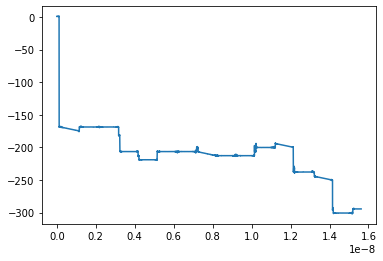

In [20]:
#Extended Kalman Filter Implementation

print("Extended Kalman Filter:")


#mod_y is the measurement with noise -> Use mod_time for sync


def gaussian_addition ( mean1 , mean2, var1, var2):

    temp = []
    temp.append ( mean1 + mean2)
    temp.append ( var1 + var2)

    return temp

def gaussian_mul ( mean1, mean2, var1, var2):

    temp = []
    temp.append ( ((var1*mean2)+(var2*mean1))/(var1+var2) )
    temp.append( (var1*var2)/(var1+var2))

    return temp

def predict ( pre_measure , current_time,  phase_variance,  noise_variance):

   # F = 1 / ( math.sqrt ( 1 - (pre_measure * pre_measure)))

    new_measure = pre_measure
 
    P = noise_variance + phase_variance

    print("Phase Variance : ", phase_variance)

    return ( new_measure, P)

def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + new_measure )
    y = actual_measure - h_x
    print("actual is :",actual_measure)
    print("Estimate is: ", h_x)

    #H calc

    H = math.cos( w + new_measure )
    H_2 = H*H

    HPH = H_2 * P
    HPHR = HPH + measurement_variance
    K = (P * H ) / HPHR
    x = new_measure + ( K * y )

    P = ( 1 - K*H ) * P
    print(x,P)

    return ( x, P )


#EKF For loop
#def predict ( pre_measure , current_time, phase_variance,  noise_variance): return ( new_measure, P)

#def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):
  #  return ( x, P )
# Declare constants

initial_phase = 1
current_time = 0
phase_var = 1
noise_var = 1
measurement_var = 0

phase_app = []
i=0

print(iterations)

while(i<iterations):

    predict_return =[]
    print("current time:", current_time,"Iterations:", i )

    phase_app.append(initial_phase)

    predict_return = predict(initial_phase, current_time,phase_var, noise_var)

    update_return = []

    update_return = update ( predict_return[0] , mod_y[i], predict_return[1], measurement_var, current_time )

    phase_var = update_return[1]

    initial_phase = update_return[0]

    current_time = current_time + d_time

    i= i + 1


matplot.plot(mod_time, phase_app)

current_time = 0
sine_new = []

i=0

for i in range (iterations):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + phase_app[i] )
    sine_new.append(h_x)
    current_time = current_time + d_time

#matplot.plot(mod_time, sine_new)
#matplot.plot(mod_time, mod_y)




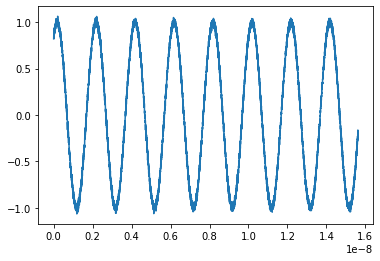

In [21]:
matplot.plot ( mod_time , mod_y )


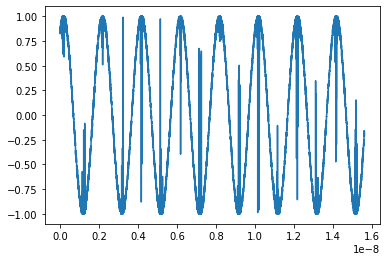

In [22]:
matplot.plot( mod_time, sine_new)

In [23]:
#Python Division testing

a = 5
b = 2

div = a//b

print(div)

if(div == 2):
    print ("Check OK")

print("Printing Phase Variance")

print(phase_var)

2
Check OK
Printing Phase Variance
0.0


Modified Extended Kalman Filter:
10000
current time: 0 Iterations: 0
actual is : 0.8224851864889924
Estimate is:  0.7833269096274834
0.962994930680485 1.1102230246251565e-16
current time: 1.5625e-12 Iterations: 1
actual is : 0.8658140759252924
Estimate is:  0.8236988468671234
1.0372686255047732 1.1102230246251565e-16
current time: 3.125e-12 Iterations: 2
actual is : 0.8626799299694425
Estimate is:  0.865969674081511
1.0306904070643554 1.1102230246251565e-16
current time: 4.6875e-12 Iterations: 3
actual is : 0.8597070767281534
Estimate is:  0.8651335665820169
1.0198707850226263 -2.220446049250313e-16
current time: 6.25e-12 Iterations: 4
actual is : 0.8749024509868448
Estimate is:  0.8621539170374022
1.0450333693023102 1.1102230246251563e-16
current time: 7.8125e-12 Iterations: 5
actual is : 0.8656598715357081
Estimate is:  0.8769973630002843
1.021437937427949 1.1102230246251565e-16
current time: 9.375e-12 Iterations: 6
actual is : 0.8711500958061317
Estimate is:  0.8678659033230472
1.02

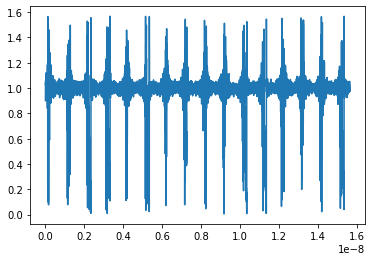

In [24]:
#Modified Extended Kalman Filter Implementation

print("Modified Extended Kalman Filter:")


#mod_y is the measurement with noise -> Use mod_time for sync


def gaussian_addition ( mean1 , mean2, var1, var2):

    temp = []
    temp.append ( mean1 + mean2)
    temp.append ( var1 + var2)

    return temp

def gaussian_mul ( mean1, mean2, var1, var2):

    temp = []
    temp.append ( ((var1*mean2)+(var2*mean1))/(var1+var2) )
    temp.append( (var1*var2)/(var1+var2))

    return temp

def predict ( pre_measure , current_time,  phase_variance,  noise_variance):

   # F = 1 / ( math.sqrt ( 1 - (pre_measure * pre_measure)))

    new_measure = pre_measure
 
    P = noise_variance + phase_variance

    return ( new_measure, P)

def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + new_measure )
    y = actual_measure - h_x
    print("actual is :",actual_measure)
    print("Estimate is: ", h_x)

    #H calc

    H = math.cos( w + new_measure )
    H_2 = H*H

    HPH = H_2 * P
    HPHR = HPH + measurement_variance
    K = (P * H ) / HPHR
    x = new_measure + ( K * y )

    P = ( 1 - K*H ) * P
    print(x,P)

    return ( x, P )


#EKF For loop
#def predict ( pre_measure , current_time, phase_variance,  noise_variance): return ( new_measure, P)

#def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):
  #  return ( x, P )
# Declare constants

initial_phase = 0.9
current_time = 0
phase_var = 0
noise_var = 1
measurement_var = 0

phase_app = []
i=0

print(iterations)

while(i<iterations):

    predict_return =[]
    print("current time:", current_time,"Iterations:", i )

    phase_app.append(initial_phase)

    predict_return = predict(initial_phase, current_time,phase_var, noise_var)

    update_return = []

    update_return = update ( predict_return[0] , mod_y[i], predict_return[1], measurement_var, current_time )

    phase_var = update_return[1]

    quotient = update_return[0] // 1.57

    initial_phase = update_return[0] - ( quotient * 1.57 )

    #initial_phase = update_return[0]

    current_time = current_time + d_time

    i= i + 1


matplot.plot(mod_time, phase_app)

current_time = 0
sine_new = []

i=0

for i in range (iterations):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + phase_app[i] )
    sine_new.append(h_x)
    current_time = current_time + d_time

#matplot.plot(mod_time, sine_new)
#matplot.plot(mod_time, mod_y)




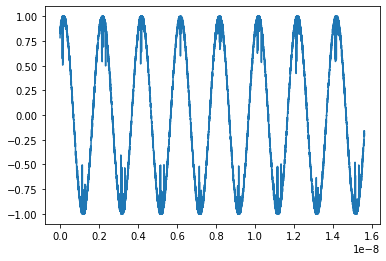

In [25]:
matplot.plot( mod_time, sine_new)

In [28]:
error = []

t= 0
ff= 0

for i in range (iterations):

    if (phase_app[i] > 0.999 and phase_app[i] < 1.0001 and ff == 0):
        print("iter:", i, "Value:",phase_app[i])
        t = 1
    
        error.append(1 - phase_app[i])
    elif (t == 1):
        ff = 1
    

iter_error = error.__len__()

error_tot = 0

for i in range (iter_error):

    error_tot = error_tot + error[i]

error_tot = error_tot/iter_error

print(error_tot)




    

iter: 267 Value: 0.9998244182033776
0.0001755817966223594


In [17]:
# This is to calculate keyrates

theta = 0.0001755817966223594


rotation_matrix = np.matrix ( [[1,0,0,0],[0,1,0,0],[0,0,math.cos(theta),math.sin(theta)],[0,0,(1)*(math.sin(theta)), math.cos(theta)]])

print("Rotation Matrix:",rotation_matrix)

v_mod = 2.5

A = v_mod+1

T = 5.41943

B = math.sqrt (T * ( (v_mod*v_mod) + (2*v_mod)) )
      
C = ( T*v_mod + 1)

print("Initial Values check")

print("A:", A,"B:",B,"C:",C)

A_mat = ( [ [A,0], [0,A] ])

B_mat = ( [ [ C, 0] , [ 0 , C*(1-(2*(math.sin(theta)*math.sin(theta))))] ])

C_mat = ( [ [ B*math.cos(theta) , ( (-1) * B *  math.sin (theta)) ] , [ ( (-1) * B *  math.sin(theta)), ( (-1) * B * math.cos(theta))] ] )


print ("A_mat: " , A_mat)

print ( "B_mat:", B_mat)

print( "C_mat: " , C_mat)

V_mat = ( [ [ A , 0 ,  B*math.cos(theta) , ( (-1) * B *  math.sin (theta)) ] , [ 0, A ,( (-1) * B *  math.sin(theta)), ( (-1) * B * math.cos(theta)) ] , [B*math.cos(theta) , ( (-1) * B *  math.sin (theta)) , C, 0 ], [ ( (-1) * B *  math.sin(theta)), ( (-1) * B * math.cos(theta)),0 , C*(1-(2*(math.sin(theta)*math.sin(theta)))) ]])

print ( "V_mat : ", V_mat)


Rotation Matrix: [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.99999985e-01 1.75581796e-04]
 [0.00000000e+00 0.00000000e+00 1.75581796e-04 9.99999985e-01]]
Initial Values check
A: 3.5 B: 7.808238437701554 C: 14.548575
A_mat:  [[3.5, 0], [0, 3.5]]
B_mat: [[14.548575, 0], [0, 14.548574102964922]]
C_mat:  [[7.8082383173415915, -0.001370984526303064], [-0.001370984526303064, -7.8082383173415915]]
V_mat :  [[3.5, 0, 7.8082383173415915, -0.001370984526303064], [0, 3.5, -0.001370984526303064, -7.8082383173415915], [7.8082383173415915, -0.001370984526303064, 14.548575, 0], [-0.001370984526303064, -7.8082383173415915, 0, 14.548574102964922]]


In [21]:
#Next steps in calculation

A_det = np.linalg.det ( A_mat )

B_det = np.linalg.det ( B_mat )

C_det = np.linalg.det ( C_mat )

V_det = np.linalg.det ( V_mat )
print ( " Calculated Determinants :" , A_det , B_det , C_det, V_det )

comp_delta = A_det + B_det + ( 2 * C_det) 

sq_temp = math.sqrt ( ( comp_delta * comp_delta ) - ( 4 * V_det ))

print("sq_temp:" , sq_temp)

delta_plus = math.sqrt ( ( comp_delta + sq_temp ) / 2)
delta_minus = math.sqrt  ( ( comp_delta - sq_temp) / 2)

print (delta_minus, delta_plus )

A_dash = A_det - ( ( B**2 * math.cos(theta)**2)/(1+C) + ( B**2 * math.sin(theta)**2)/(C*(1-2*(math.sin(theta)**2))+1))

print ("A_dash:", A_dash)

 Calculated Determinants : 12.250000000000002 211.66102148004273 -60.96858750000005 100.9738910793604
sq_temp: 99.97384558782294
1.0000002230549008 10.04857432842753
